In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


KeyboardInterrupt: 

In [2]:
TRAIN_DIR = ('C:/Users/shahe/Desktop/alzheimers/train/')
TEST_DIR = ('C:/Users/shahe/Desktop/alzheimers/test/')

In [3]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # We are aware of it.

In [4]:
import os
CLASSES = os.listdir(TRAIN_DIR)
NUM_CLASSES = len(CLASSES)
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 
 and the length is : 4


In [ ]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [6]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 5121 images belonging to 4 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
test_set = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1279 images belonging to 4 classes.


In [9]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
161/161 [==============================] - 1788s 11s/step - loss: 1.0372 - acc: 0.5504 - val_loss: 0.9309 - val_acc: 0.6020
Epoch 2/5
161/161 [==============================] - 1746s 11s/step - loss: 0.7713 - acc: 0.6576 - val_loss: 0.9445 - val_acc: 0.6419
Epoch 3/5
161/161 [==============================] - 1702s 11s/step - loss: 0.7346 - acc: 0.6823 - val_loss: 0.9889 - val_acc: 0.6286
Epoch 4/5
161/161 [==============================] - 1732s 11s/step - loss: 0.6808 - acc: 0.7050 - val_loss: 1.2911 - val_acc: 0.5794
Epoch 5/5
161/161 [==============================] - 1706s 11s/step - loss: 0.6148 - acc: 0.7329 - val_loss: 1.0434 - val_acc: 0.6075


In [17]:
# get sample image to test.
img_mildD = image.load_img('C:/Users/shahe/Desktop/alzheimers/test/MildDemented/26 (19).jpg', target_size = (224, 224))
img_modD = image.load_img('C:/Users/shahe/Desktop/alzheimers/test/ModerateDemented/27 (2).jpg', target_size = (224, 224))
# get sample image to test.
img_NonD = image.load_img('C:/Users/shahe/Desktop/alzheimers/test/NonDemented/26 (62).jpg', target_size = (224, 224))
img_vMildD = image.load_img('C:/Users/shahe/Desktop/alzheimers/test/VeryMildDemented/26 (44).jpg', target_size = (224, 224))

In [18]:
#['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    result = np.argmax(np.array(result))
    
    if result == 0: result = 'MildDemented'
    elif result == 1: result = 'ModerateDemented'
    elif result == 2: result = 'NonDemented'
    else: result = 'VeryMildDemented'
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    

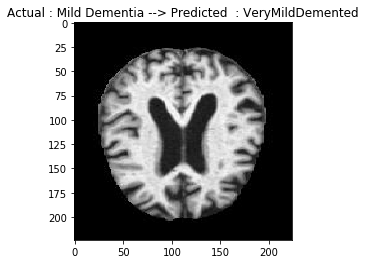

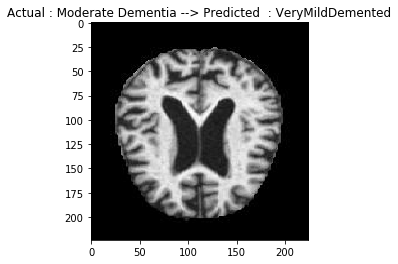

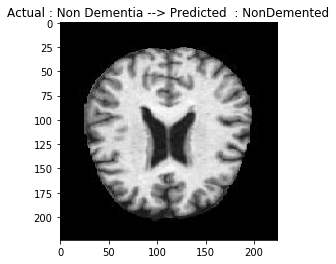

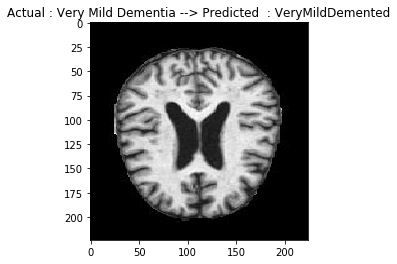

In [19]:
model_predict(img_mildD, "Mild Dementia")
model_predict(img_modD, "Moderate Dementia")
model_predict(img_NonD, "Non Dementia")
model_predict(img_vMildD, "Very Mild Dementia")

In [ ]:
model.save("Alzhiemers Detection.h5")